In [1]:
library(SuperExactTest)
library(UpSetR)
library(RVenn)
library(dplyr)
library(reshape2)
library(RPostgreSQL)
library(tidyverse)

Loading required package: grid

Attaching package: ‘SuperExactTest’

The following objects are masked from ‘package:base’:

    intersect, union


Attaching package: ‘dplyr’

The following objects are masked from ‘package:SuperExactTest’:

    intersect, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: DBI
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ stringr 1.4.0
✔ tidyr   1.0.2     ✔ forcats 0.5.0
✔ readr   1.3.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::unite()  masks RVenn::unite()


In [2]:
traits=gsub(" +all.tsv","",gsub("FDGENEA\\.","",list.files(path="../all_subnetworks/",pattern="*all.tsv")))

In [3]:
d=do.call(rbind.data.frame,lapply(seq_len(length(traits)),function(i){
    data.frame(trait=traits[i],read.delim(paste0("../",sprintf("FDGENEA.%s all.tsv",traits[i])),sep="\t",stringsAsFactors=FALSE),stringsAsFactors=FALSE)
    }))
head(d)

,trait,geneid,associated,downstream,downstream_reg,downstream_TF,downstream_cab,downstream_cb,direct,direct_reg,⋯,is_regulator,gene_name,reg_class,superfamily,description,color,test_stat,b,qval_lrt,direction
,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,colony_size.normal_vs_enlarged,Pp3c1_10460.mRNA,TRUE,0,0,0,0.9355340,-0.9355340,0,0,⋯,FALSE,NA,NA,NA,PF00407 - Pathogenesis-related protein Bet v I family (Bet_v_1) (1 of 7),#C66764,6.724139,-0.9355340,3.695407e-02,down
2,colony_size.normal_vs_enlarged,Pp3c1_10970.mRNA,TRUE,0,0,0,0.3323997,0.3323997,0,0,⋯,FALSE,NA,NA,NA,PF08263 - Leucine rich repeat N-terminal domain (LRRNT_2) (1 of 120),#E486B7,5.733587,0.3323997,5.237857e-02,up
3,colony_size.normal_vs_enlarged,Pp3c1_11030.mRNA,TRUE,0,0,0,0.8962726,0.8962726,0,0,⋯,FALSE,NA,NA,NA,2.7.11.18 - [Myosin light-chain] kinase / Smooth-muscle-myosin-light-chain kinase (1 of 3),#E486B7,14.054509,0.8962726,1.658819e-03,up
4,colony_size.normal_vs_enlarged,Pp3c1_11310.mRNA,TRUE,0,0,0,6.0579269,-6.0579269,0,0,⋯,FALSE,NA,NA,NA,NA,#C66764,59.261505,-6.0579269,3.741178e-12,down
5,colony_size.normal_vs_enlarged,Pp3c1_11500.mRNA,TRUE,0,0,0,1.9195229,-1.9195229,0,0,⋯,FALSE,NA,NA,NA,K11816 - indole-3-pyruvate monooxygenase (YUCCA) (1 of 5),#E486B7,21.327909,-1.9195229,6.695231e-05,down
6,colony_size.normal_vs_enlarged,Pp3c1_11980.mRNA,TRUE,0,0,0,0.5203359,0.5203359,0,0,⋯,FALSE,NA,NA,NA,PF06886 - Targeting protein for Xklp2 (TPX2) (TPX2) (1 of 18),#E486B7,19.270473,0.5203359,1.652477e-04,up


In [4]:
table(d$associated,d$qval_lrt<0.1)

       
        FALSE  TRUE
  FALSE   716   123
  TRUE      0 37597

In [5]:
d %>% filter(associated & qval_lrt<0.1) %>% select(geneid) %>% distinct() %>% count()

n
<int>
10355


In [ ]:
e=read.delim("../../4paper/major_sets.tsv",sep="\t",stringsAsFactors=FALSE)

In [7]:
nrow(d)
nrow(e)
D=merge(d,e,by="geneid")
nrow(D)
D=droplevels(subset(D,associated==TRUE & direction != "unchanged" & DEK1_target != "no" & mutant_pattern!= "TF with deregulated target"))

[1] 38436

[1] 5799

[1] 13936

In [8]:
intersect( 
    d %>% filter(associated & qval_lrt<0.1) %>% select(geneid) %>% distinct() ,
    e %>% filter(DEK1_target != "no" & mutant_pattern!= "TF with deregulated target")  %>% select(geneid) %>% distinct() ) %>% nrow()

[1] 2048

In [9]:
intersect( 
    d %>% filter(associated & qval_lrt<0.1) %>% select(geneid) %>% distinct() ,
    e %>% filter(DEK1_target != "no")  %>% select(geneid) %>% distinct() ) %>% nrow()

[1] 2206

In [10]:
setdiff( 
    d %>% filter(associated & qval_lrt<0.1) %>% select(geneid) %>% distinct() ,
    e %>% filter(DEK1_target != "no" & mutant_pattern!= "TF with deregulated target")  %>% select(geneid) %>% distinct() ) %>% nrow()

[1] 8307

In [11]:
nrow(D)

[1] 8758

In [12]:
table(D$trait,D$direction)

                                                
                                                 down  up
  colony_size.normal_vs_enlarged                  714 379
  colony_size.normal_vs_reduced                    96  69
  development_of_phyllids.normal_vs_aberrant       74  85
  development_of_phyllids.normal_vs_delayed       550 268
  elongation_caulonema_early.normal_vs_elongated  426 199
  elongation_caulonema_early.normal_vs_reduced    117 137
  elongation_caulonema_late.normal_vs_elongated   748 430
  elongation_caulonema_late.normal_vs_reduced     118  42
  gametophore_formation.normal_vs_aberrant         74  85
  gametophore_formation.normal_vs_arrested        121 237
  gametophore_formation.normal_vs_delayed         550 268
  number_buds_per_filament.normal_vs_high         299 663
  percents_filaments_with_buds.normal_vs_high      51 157
  percents_filaments_with_buds.normal_vs_low       10   5
  protonemata_branching.normal_vs_aberrant         74 155
  rhizoid_formation.nor

In [13]:
X=D %>% 
    count(trait,direction,mutant_pattern)  %>%
    group_by(trait,direction) %>%
    mutate(percent=prop.table(n)*100)

In [14]:
head(X)

trait,direction,mutant_pattern,n,percent
<chr>,<chr>,<chr>,<int>,<dbl>
colony_size.normal_vs_enlarged,down,activator target,713,99.859944
colony_size.normal_vs_enlarged,down,repressor target,1,0.140056
colony_size.normal_vs_enlarged,up,activator target,7,1.846966
colony_size.normal_vs_enlarged,up,repressor target,372,98.153034
colony_size.normal_vs_reduced,down,activator target,81,84.375000
colony_size.normal_vs_reduced,down,repressor target,15,15.625000


In [15]:
XX=X[X$percent>90 & X$direction=="up",]
XD=X[X$percent>90 & X$direction=="down",]

In [16]:
XX=XX[order(XX$mutant_pattern,-XX$n),]
XX

trait,direction,mutant_pattern,n,percent
<chr>,<chr>,<chr>,<int>,<dbl>
number_buds_per_filament.normal_vs_high,up,activator target,663,100.00000
rhizoid_formation.normal_vs_ectopic,up,activator target,357,100.00000
gametophore_formation.normal_vs_arrested,up,activator target,237,100.00000
percents_filaments_with_buds.normal_vs_high,up,activator target,157,100.00000
elongation_caulonema_late.normal_vs_elongated,up,repressor target,413,96.04651
colony_size.normal_vs_enlarged,up,repressor target,372,98.15303
rhizoid_formation.normal_vs_delayed,up,repressor target,367,94.58763
development_of_phyllids.normal_vs_delayed,up,repressor target,261,97.38806
gametophore_formation.normal_vs_delayed,up,repressor target,261,97.38806


In [17]:
XD=XD[order(XD$mutant_pattern,-XD$n),]
XD

trait,direction,mutant_pattern,n,percent
<chr>,<chr>,<chr>,<int>,<dbl>
elongation_caulonema_late.normal_vs_elongated,down,activator target,743,99.33155
colony_size.normal_vs_enlarged,down,activator target,713,99.85994
rhizoid_formation.normal_vs_delayed,down,activator target,698,98.86686
development_of_phyllids.normal_vs_delayed,down,activator target,547,99.45455
gametophore_formation.normal_vs_delayed,down,activator target,547,99.45455
elongation_caulonema_early.normal_vs_elongated,down,activator target,425,99.76526
elongation_caulonema_late.normal_vs_reduced,down,activator target,118,100.00000
percents_filaments_with_buds.normal_vs_low,down,activator target,10,100.00000
number_buds_per_filament.normal_vs_high,down,repressor target,299,100.00000


In [18]:
M=sapply(unique(D$mutant_pattern),function(n) unique(D[D$mutant_pattern==n,"geneid"]))
T=sapply(unique(D$trait),function(n) unique(D[D$trait==n & D$direction == "up" & D$associated ==TRUE,"geneid"]))
P=c(M,T)
str(P)

List of 19
 $ activator target                              : chr [1:1307] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" "Pp3c1_15010.mRNA" ...
 $ repressor target                              : chr [1:741] "Pp3c1_11190.mRNA" "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_13890.mRNA" ...
 $ gametophore_formation.normal_vs_arrested      : chr [1:237] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_20430.mRNA" "Pp3c1_23790.mRNA" ...
 $ number_buds_per_filament.normal_vs_high       : chr [1:663] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" "Pp3c1_16700.mRNA" ...
 $ elongation_caulonema_early.normal_vs_elongated: chr [1:199] "Pp3c1_11190.mRNA" "Pp3c1_14300.mRNA" "Pp3c1_16170.mRNA" "Pp3c1_17990.mRNA" ...
 $ rhizoid_formation.normal_vs_delayed           : chr [1:388] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ colony_size.normal_vs_enlarged                : chr [1:379] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_164

In [19]:
TD=sapply(unique(D$trait),function(n) unique(D[D$trait==n & D$direction == "down" & D$associated ==TRUE,"geneid"]))
TU=T
names(TU)=paste(names(TU),"up",sep=".")
names(TD)=paste(names(TD),"down",sep=".")
PD=c(TU,TD)
str(PD)

List of 34
 $ gametophore_formation.normal_vs_arrested.up        : chr [1:237] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_20430.mRNA" "Pp3c1_23790.mRNA" ...
 $ number_buds_per_filament.normal_vs_high.up         : chr [1:663] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" "Pp3c1_16700.mRNA" ...
 $ elongation_caulonema_early.normal_vs_elongated.up  : chr [1:199] "Pp3c1_11190.mRNA" "Pp3c1_14300.mRNA" "Pp3c1_16170.mRNA" "Pp3c1_17990.mRNA" ...
 $ rhizoid_formation.normal_vs_delayed.up             : chr [1:388] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ colony_size.normal_vs_enlarged.up                  : chr [1:379] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ elongation_caulonema_late.normal_vs_elongated.up   : chr [1:430] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed.up       : chr [1:268] "Pp3c1_12730.mRNA" "Pp3c1_14670.m

In [20]:
PP=Venn(P)

In [21]:
E=do.call(rbind.data.frame, lapply(3:19,function(i) {
    a=enrichment_test(PP,1,i)$Significance
    r=enrichment_test(PP,2,i)$Significance
    data.frame(trait=names(P)[i],activator.pvalue=a,repressor.pvalue=r)
}))

cl
1 2 
8 9 

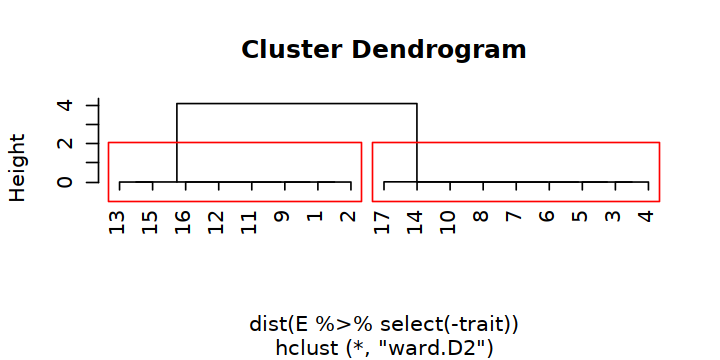

In [22]:
options(repr.plot.width=6, repr.plot.height=3)
h=hclust(dist(E %>% select(-trait)),method="ward.D2")
E=E%>% mutate(trait=factor(trait,levels=trait[h$order]))
cl=cutree(h,h=2)
plot(h)
rect.hclust(h,h=2)
table(cl)
E$cluster=cl

In [23]:
E %>% arrange(cluster,activator.pvalue,repressor.pvalue)

trait,activator.pvalue,repressor.pvalue,cluster
<fct>,<dbl>,<dbl>,<int>
gametophore_formation.normal_vs_arrested,0.0000,1.0000,1
number_buds_per_filament.normal_vs_high,0.0000,1.0000,1
protonemata_branching.normal_vs_aberrant,0.0000,1.0000,1
percents_filaments_with_buds.normal_vs_high,0.0000,1.0000,1
rhizoid_formation.normal_vs_ectopic,0.0000,1.0000,1
elongation_caulonema_early.normal_vs_reduced,0.0003,0.9999,1
gametophore_formation.normal_vs_aberrant,0.0006,0.9997,1
development_of_phyllids.normal_vs_aberrant,0.0006,0.9997,1
colony_size.normal_vs_reduced,0.9997,0.0004,2


Saving 6.67 x 6.67 in image


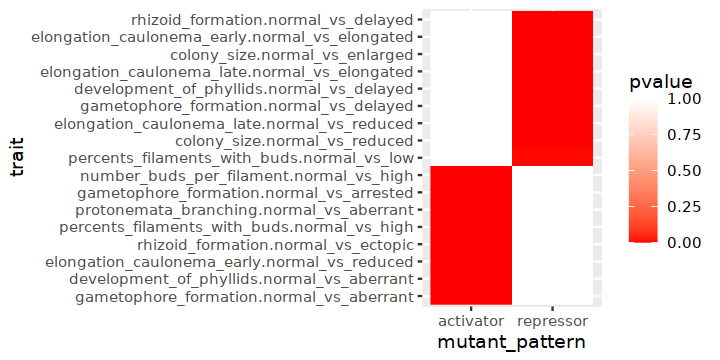

In [24]:
options(repr.plot.width=6, repr.plot.height=3)
g=E %>%
    pivot_longer(! c(trait,cluster),names_to="mutant_pattern",values_to="pvalue") %>% 
    mutate(mutant_pattern=gsub("\\.pvalue","",mutant_pattern)) %>%
    ggplot(aes(y=trait,x=mutant_pattern,fill=pvalue)) + 
    geom_raster() + scale_fill_gradient(low = "red", high = "white", na.value = NA)
g
ggsave(g,filename="DEK1_targets.mutant_pattern.FDGENEA_set_enrichments.pvalues.pdf")

List of 4
 $ number_buds_per_filament.normal_vs_high    : chr [1:663] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" "Pp3c1_16700.mRNA" ...
 $ rhizoid_formation.normal_vs_ectopic        : chr [1:357] "Pp3c1_22040.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_23830.mRNA" "Pp3c1_27500.mRNA" ...
 $ gametophore_formation.normal_vs_arrested   : chr [1:237] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_20430.mRNA" "Pp3c1_23790.mRNA" ...
 $ percents_filaments_with_buds.normal_vs_high: chr [1:157] "Pp3c1_13200.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_27500.mRNA" "Pp3c1_32020.mRNA" ...


png 
  2

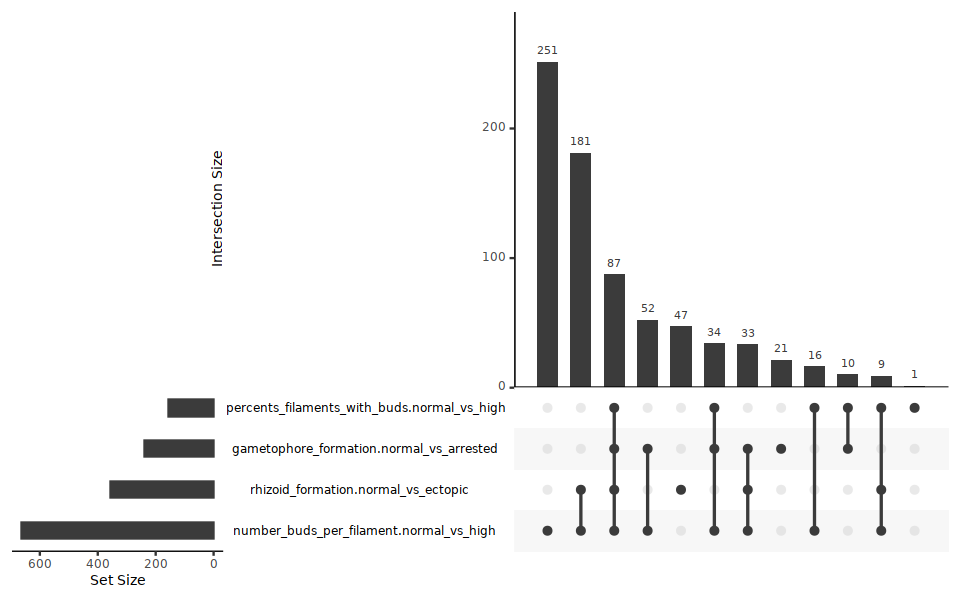

In [25]:
TT=T[subset(XX,mutant_pattern=="activator target")$trait]
str(TT)

options(repr.plot.width=8, repr.plot.height=5)
u=upset(fromList(TT), order.by = "freq",keep.order = TRUE,nsets=length(names(TT)),nintersects=40,mb.ratio = c(0.65, 0.35))
u

pdf("DEK1_targets.mutant_pattern.FDGENEA_sets.activators.upsetR.pdf")
u
dev.off()

png 
  2

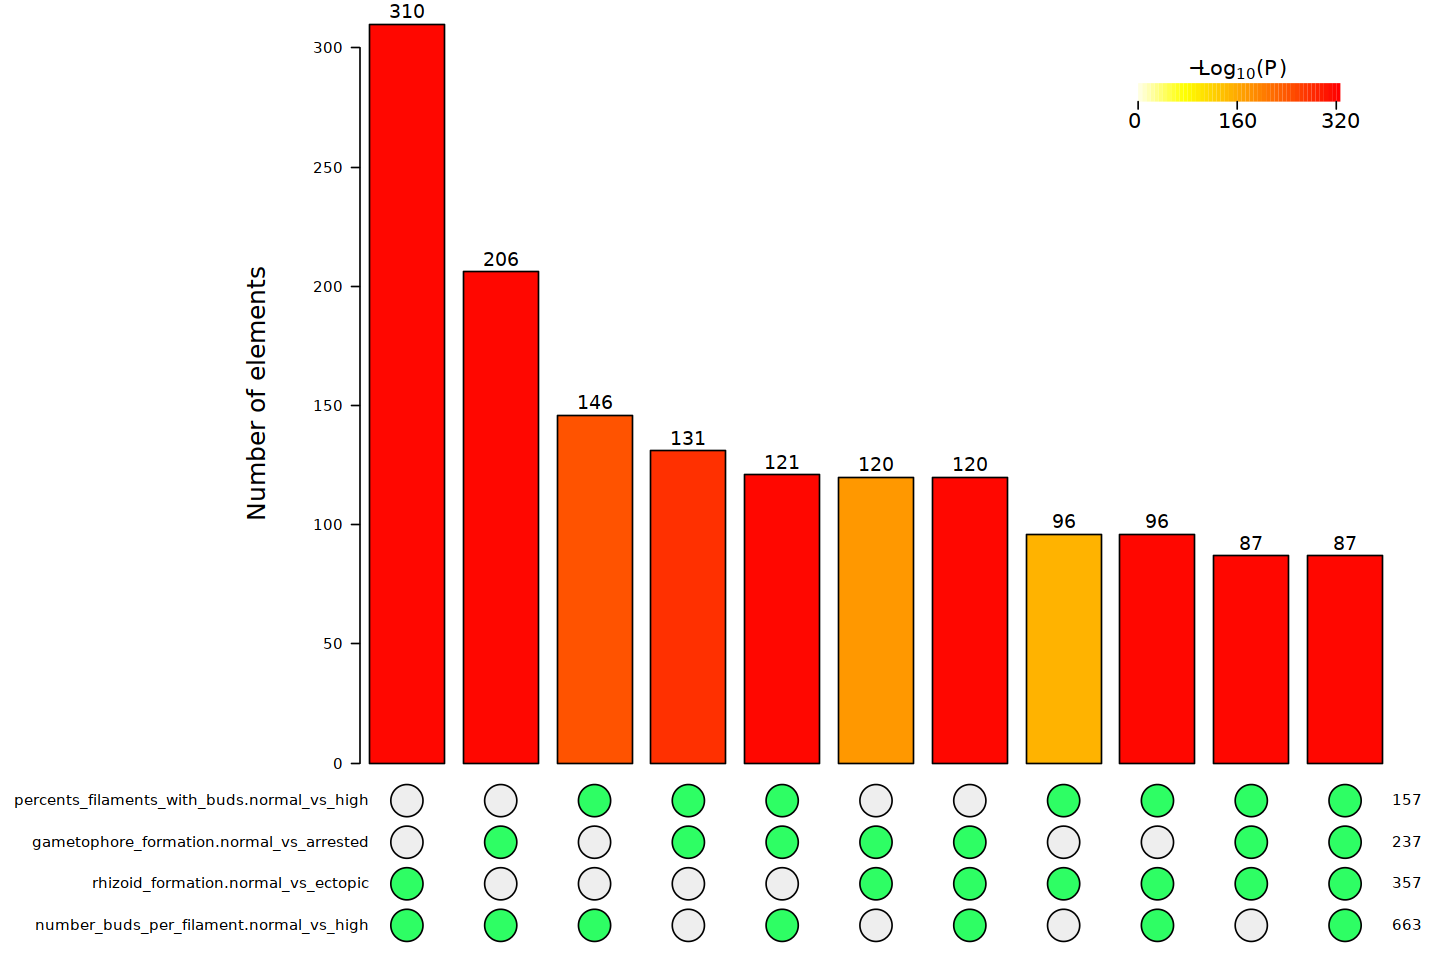

In [26]:
total=37360

res=supertest(TT, n=total)

options(repr.plot.width=12, repr.plot.height=8)
plot(res, Layout="landscape", degree=2:length(TT), sort.by="size", margin=c(0.5,15,1,2),cex=.7)
pdf("DEK1_targets.mutant_pattern.FDGENEA_sets.activators.supertest.pdf",width=10,height=8)
plot(res, Layout="landscape", degree=2:length(TT), sort.by="size", margin=c(0.5,15,1,2),cex=.7)
dev.off()

List of 8
 $ elongation_caulonema_late.normal_vs_elongated : chr [1:430] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ colony_size.normal_vs_enlarged                : chr [1:379] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ rhizoid_formation.normal_vs_delayed           : chr [1:388] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed     : chr [1:268] "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" "Pp3c1_17860.mRNA" ...
 $ gametophore_formation.normal_vs_delayed       : chr [1:268] "Pp3c1_12730.mRNA" "Pp3c1_14670.mRNA" "Pp3c1_16461.mRNA" "Pp3c1_17860.mRNA" ...
 $ elongation_caulonema_early.normal_vs_elongated: chr [1:199] "Pp3c1_11190.mRNA" "Pp3c1_14300.mRNA" "Pp3c1_16170.mRNA" "Pp3c1_17990.mRNA" ...
 $ elongation_caulonema_late.normal_vs_reduced   : chr [1:42] "Pp3c1_16461.mRNA" "Pp3c1_17860.mRNA" "Pp3c1_18280.mRNA" "Pp3c1_210.mR

[1] 8

png 
  2

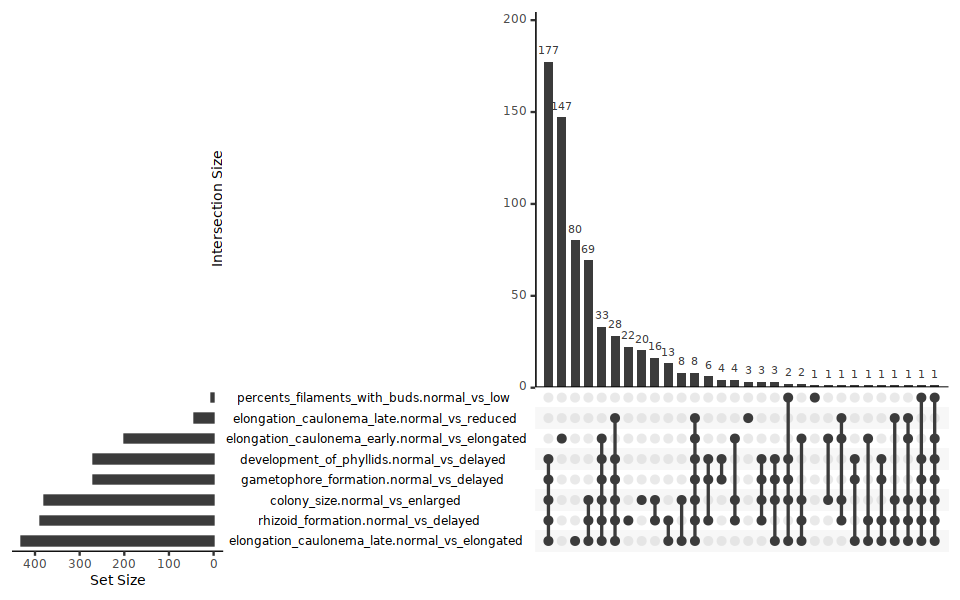

In [27]:
TT=T[subset(XX,mutant_pattern=="repressor target")$trait]
str(TT)
length(TT)

options(repr.plot.width=8, repr.plot.height=5)
u=upset(fromList(TT), order.by = "freq",keep.order = TRUE,nsets=length(names(TT)),nintersects=40,mb.ratio = c(0.65, 0.35))
u
pdf("DEK1_targets.mutant_pattern.FDGENEA_sets.repressors.upsetR.pdf")
u
dev.off()

Warning message in otab.kept[otab.kept] <- kpt:
“number of items to replace is not a multiple of replacement length”Warning message in otab.kept[otab.kept] <- kpt:
“number of items to replace is not a multiple of replacement length”

png 
  2

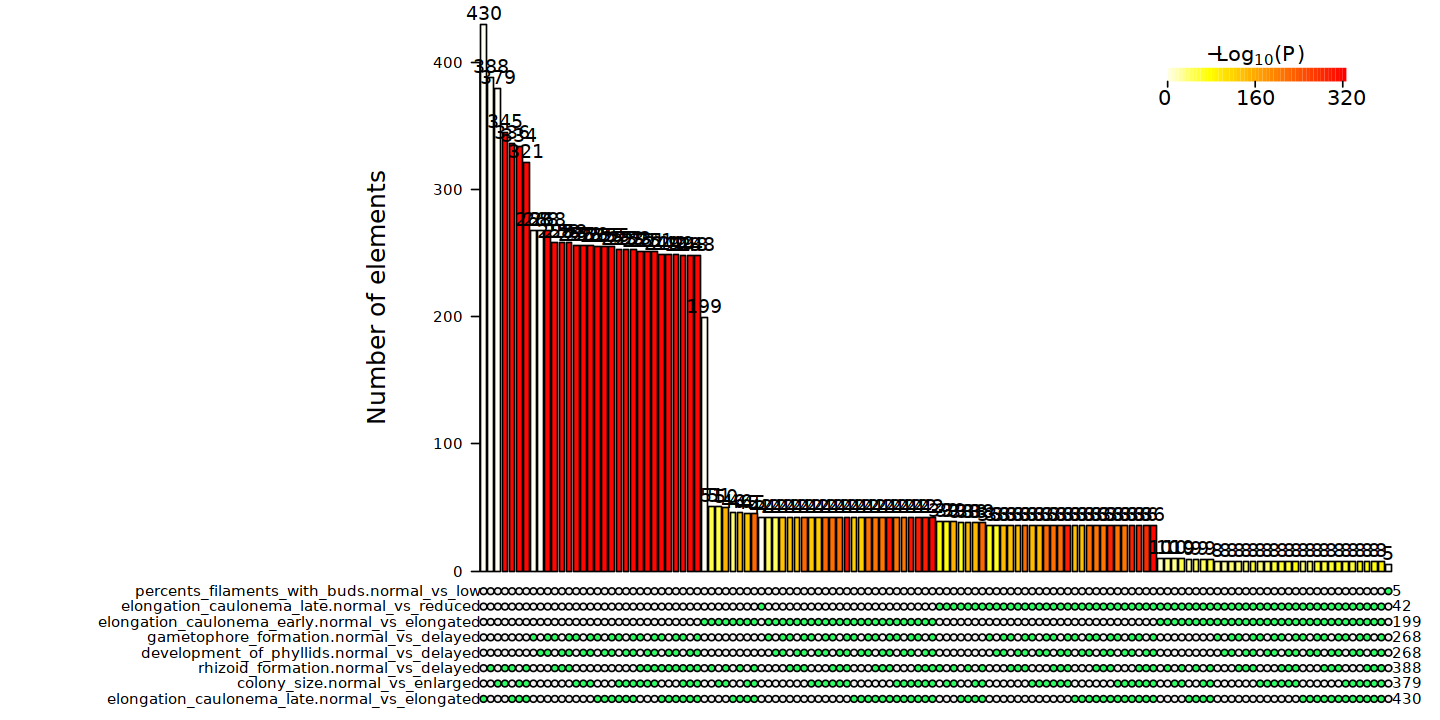

In [28]:
total=37360
res=supertest(TT, n=total)
options(repr.plot.width=12, repr.plot.height=6)
plot(res, Layout="landscape", degree=1:length(TT), sort.by="size", margin=c(0.5,20,1,2),cex=.7,
     keep.empty.intersections=FALSE,min.intersection.size=5)
pdf("DEK1_targets.mutant_pattern.FDGENEA_sets.repressors.supertest.pdf",width=10,height=8)
plot(res, Layout="landscape", degree=1:length(TT), sort.by="size", margin=c(0.5,20,1,2),cex=.7,
     keep.empty.intersections=FALSE,min.intersection.size=5)
dev.off()

In [29]:
tt=c(subset(XX,mutant_pattern=="activator target")$trait,"percents_filaments_with_buds.normal_vs_low")
ttt=c(paste(tt,"up",sep="."),paste(tt,"down",sep="."))

List of 10
 $ number_buds_per_filament.normal_vs_high.up      : chr [1:663] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" "Pp3c1_16700.mRNA" ...
 $ rhizoid_formation.normal_vs_ectopic.up          : chr [1:357] "Pp3c1_22040.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_23830.mRNA" "Pp3c1_27500.mRNA" ...
 $ gametophore_formation.normal_vs_arrested.up     : chr [1:237] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_20430.mRNA" "Pp3c1_23790.mRNA" ...
 $ percents_filaments_with_buds.normal_vs_high.up  : chr [1:157] "Pp3c1_13200.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_27500.mRNA" "Pp3c1_32020.mRNA" ...
 $ percents_filaments_with_buds.normal_vs_low.up   : chr [1:5] "Pp3c1_27270.mRNA" "Pp3c1_3380.mRNA" "Pp3c17_18410.mRNA" "Pp3c19_14430.mRNA" ...
 $ number_buds_per_filament.normal_vs_high.down    : chr [1:299] "Pp3c1_12070.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_13890.mRNA" "Pp3c1_14670.mRNA" ...
 $ rhizoid_formation.normal_vs_ectopic.down        : chr [1:106] "Pp3c1_13890.mRNA" "Pp3c1_16461.mRNA" "Pp3c1_17860.mRNA

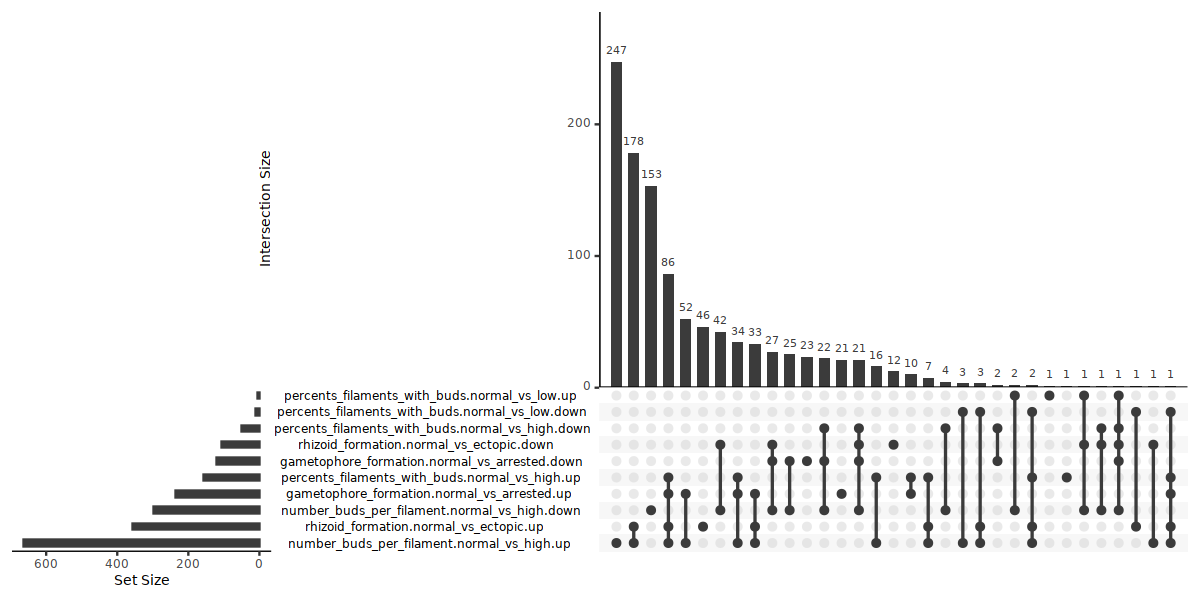

In [30]:
TT=PD[ttt]
str(TT)

options(repr.plot.width=10, repr.plot.height=5)
u=upset(fromList(TT), order.by = "freq",keep.order = TRUE,nsets=length(names(TT)),nintersects=40,mb.ratio = c(0.65, 0.35))
u

In [31]:
total=37360

res=supertest(TT, n=total)

Warning message in otab.kept[otab.kept] <- kpt:
“number of items to replace is not a multiple of replacement length”

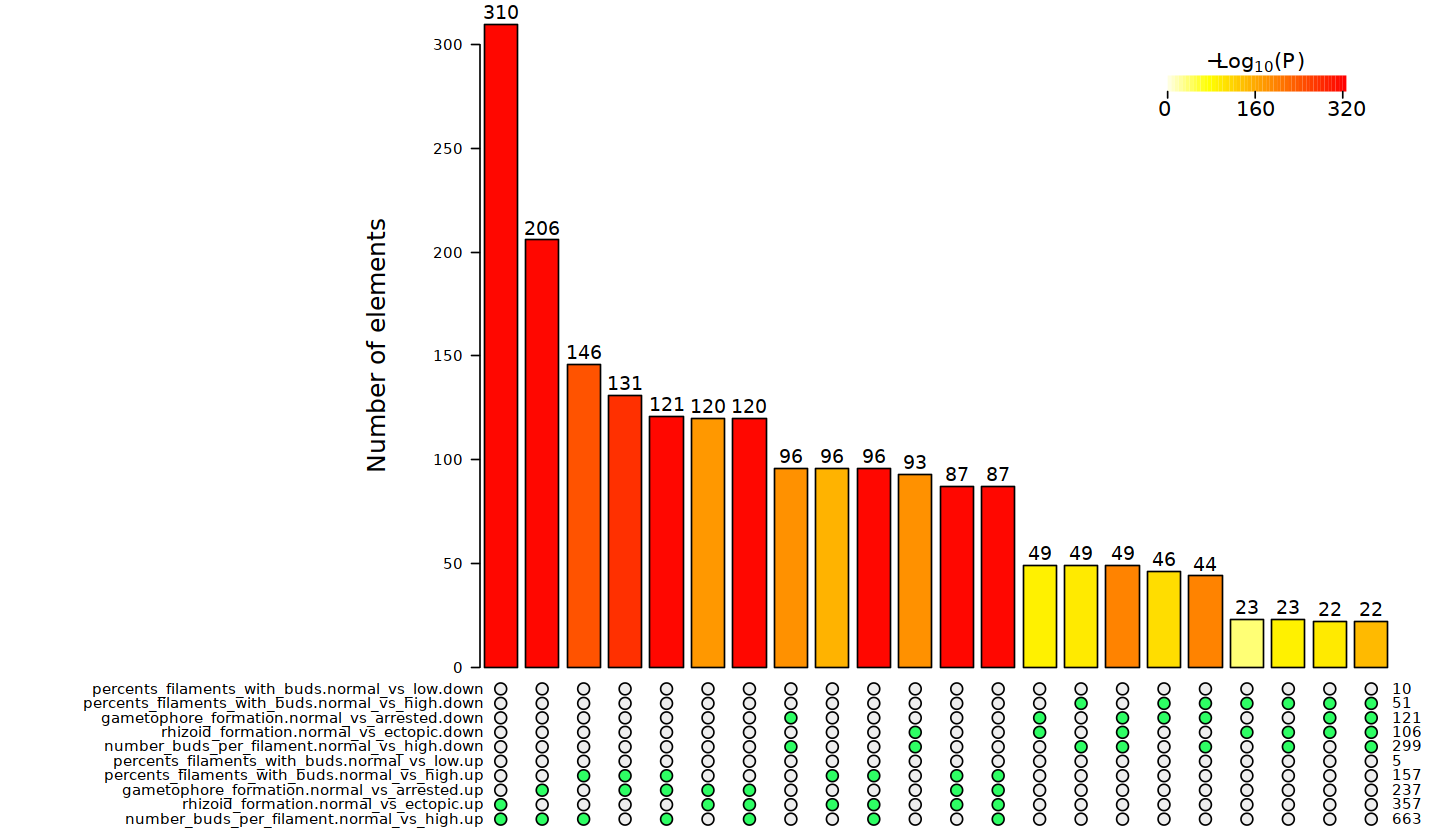

In [32]:
options(repr.plot.width=12, repr.plot.height=7)
plot(res, Layout="landscape", degree=2:length(TT), sort.by="size", margin=c(0.5,20,1,2),cex=.7,keep.empty.intersections=FALSE,min.intersection.size=10)

In [33]:
o=read.delim("FDGENEA.number_buds_per_filament.normal_vs_high all.tsv",sep="\t",stringsAsFactors=FALSE)
head(o)

,geneid,associated,downstream,downstream_reg,downstream_TF,downstream_cab,downstream_cb,direct,direct_reg,direct_TF,⋯,is_regulator,gene_name,reg_class,superfamily,description,color,test_stat,b,qval_lrt,direction
,<chr>,<lgl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Pp3c1_10400.mRNA,TRUE,0,0,0,0.1977090,0.1977090,0,0,0,⋯,FALSE,NA,NA,NA,"PTHR11731//PTHR11731:SF126 - PROTEASE FAMILY S9B,C DIPEPTIDYL-PEPTIDASE IV-RELATED // SUBFAMILY NOT NAMED (1 of 1)",#449B76,11.80757,0.1977090,0.0109561212,up
2,Pp3c1_1080.mRNA,TRUE,0,0,0,0.7328859,-0.7328859,0,0,0,⋯,FALSE,NA,NA,NA,NA,#E41A1C,9.55567,-0.7328859,0.0249199997,down
3,Pp3c1_10970.mRNA,TRUE,0,0,0,0.4193551,-0.4193551,0,0,0,⋯,FALSE,NA,NA,NA,PF08263 - Leucine rich repeat N-terminal domain (LRRNT_2) (1 of 120),#E486B7,19.45862,-0.4193551,0.0006677017,down
4,Pp3c1_11030.mRNA,TRUE,0,0,0,0.6112699,-0.6112699,0,0,0,⋯,FALSE,NA,NA,NA,2.7.11.18 - [Myosin light-chain] kinase / Smooth-muscle-myosin-light-chain kinase (1 of 3),#E486B7,10.36913,-0.6112699,0.0185069608,down
5,Pp3c1_11690.mRNA,TRUE,0,0,0,0.5351013,-0.5351013,0,0,0,⋯,FALSE,NA,NA,NA,"K09832 - cytochrome P450, family 710, subfamily A (CYP710A) (1 of 2)",#FFE529,14.49643,-0.5351013,0.0041885256,down
6,Pp3c1_11980.mRNA,TRUE,0,0,0,0.3523362,-0.3523362,0,0,0,⋯,FALSE,NA,NA,NA,PF06886 - Targeting protein for Xklp2 (TPX2) (TPX2) (1 of 18),#E486B7,13.82813,-0.3523362,0.0052538964,down


In [34]:
table(subset(o,associated ==TRUE)$direction)


down   up 
1736 1989 

In [35]:
write.table(subset(D,trait=="number_buds_per_filament.normal_vs_high"),file="FDGENEA.number_buds_per_filament.normal_vs_high.only_mutant_pattern.tsv",
            sep="\t",col.names=TRUE,row.names=FALSE)

In [36]:
nrow(o)
O=merge(o,e,by="geneid",all.x=TRUE,all.y=FALSE)
nrow(O)


[1] 3808

[1] 3808

In [37]:
ttt=sort(ttt)

In [38]:
TU=sapply(unique(d$trait),function(n) unique(d[d$trait==n & d$direction == "up" & d$associated ==TRUE,"geneid"]))
TD=sapply(unique(d$trait),function(n) unique(d[d$trait==n & d$direction == "down" & d$associated ==TRUE,"geneid"]))
names(TU)=paste(names(TU),"up",sep=".")
names(TD)=paste(names(TD),"down",sep=".")
PD=c(TU,TD)
str(PD)

List of 34
 $ colony_size.normal_vs_enlarged.up                  : chr [1:2108] "Pp3c1_10970.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11980.mRNA" "Pp3c1_12070.mRNA" ...
 $ colony_size.normal_vs_reduced.up                   : chr [1:734] "Pp3c1_1080.mRNA" "Pp3c1_13570.mRNA" "Pp3c1_13890.mRNA" "Pp3c1_14330.mRNA" ...
 $ development_of_phyllids.normal_vs_aberrant.up      : chr [1:473] "Pp3c1_12810.mRNA" "Pp3c1_13890.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_27270.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed.up       : chr [1:1699] "Pp3c1_11030.mRNA" "Pp3c1_11980.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_12800.mRNA" ...
 $ elongation_caulonema_early.normal_vs_elongated.up  : chr [1:771] "Pp3c1_11190.mRNA" "Pp3c1_12140.mRNA" "Pp3c1_14300.mRNA" "Pp3c1_14540.mRNA" ...
 $ elongation_caulonema_early.normal_vs_reduced.up    : chr [1:829] "Pp3c1_12470.mRNA" "Pp3c1_13060.mRNA" "Pp3c1_14630.mRNA" "Pp3c1_14631.mRNA" ...
 $ elongation_caulonema_late.normal_vs_elongated.up   : chr [1:2731] "Pp3c1_1080.mRNA" "Pp3c1_11030.

In [39]:
TT=PD[ttt]
str(TT)

List of 10
 $ gametophore_formation.normal_vs_arrested.down   : chr [1:1012] "Pp3c1_10460.mRNA" "Pp3c1_10970.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11310.mRNA" ...
 $ gametophore_formation.normal_vs_arrested.up     : chr [1:691] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13820.mRNA" "Pp3c1_20430.mRNA" ...
 $ number_buds_per_filament.normal_vs_high.down    : chr [1:1218] "Pp3c1_10970.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11690.mRNA" "Pp3c1_11980.mRNA" ...
 $ number_buds_per_filament.normal_vs_high.up      : chr [1:1455] "Pp3c1_10400.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" "Pp3c1_15500.mRNA" ...
 $ percents_filaments_with_buds.normal_vs_high.down: chr [1:444] "Pp3c1_10970.mRNA" "Pp3c1_11310.mRNA" "Pp3c1_11690.mRNA" "Pp3c1_14330.mRNA" ...
 $ percents_filaments_with_buds.normal_vs_high.up  : chr [1:378] "Pp3c1_13200.mRNA" "Pp3c1_23040.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_24350.mRNA" ...
 $ percents_filaments_with_buds.normal_vs_low.down : chr [1:148] "Pp3c1_13840.mRNA" "Pp3c1_15279.mRNA" "Pp3c1_15290.

In [40]:
OO=do.call(cbind.data.frame,lapply(ttt,function(n){
    O$geneid %in% TT[[n]]
}))
names(OO)=ttt
row.names(OO)=O$geneid
OOO=OO
head(OO)

,gametophore_formation.normal_vs_arrested.down,gametophore_formation.normal_vs_arrested.up,number_buds_per_filament.normal_vs_high.down,number_buds_per_filament.normal_vs_high.up,percents_filaments_with_buds.normal_vs_high.down,percents_filaments_with_buds.normal_vs_high.up,percents_filaments_with_buds.normal_vs_low.down,percents_filaments_with_buds.normal_vs_low.up,rhizoid_formation.normal_vs_ectopic.down,rhizoid_formation.normal_vs_ectopic.up
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Pp3c1_10400.mRNA,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Pp3c1_1080.mRNA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Pp3c1_10970.mRNA,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
Pp3c1_11030.mRNA,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Pp3c1_11690.mRNA,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
Pp3c1_11980.mRNA,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [41]:
nrow(OO)
OO=merge(O,OO,by.x="geneid",by.y=0)
nrow(O)
nrow(OO)
head(OO)

[1] 3808

[1] 3808

[1] 3808

,geneid,associated,downstream,downstream_reg,downstream_TF,downstream_cab,downstream_cb,direct,direct_reg,direct_TF,⋯,gametophore_formation.normal_vs_arrested.down,gametophore_formation.normal_vs_arrested.up,number_buds_per_filament.normal_vs_high.down,number_buds_per_filament.normal_vs_high.up,percents_filaments_with_buds.normal_vs_high.down,percents_filaments_with_buds.normal_vs_high.up,percents_filaments_with_buds.normal_vs_low.down,percents_filaments_with_buds.normal_vs_low.up,rhizoid_formation.normal_vs_ectopic.down,rhizoid_formation.normal_vs_ectopic.up
,<chr>,<lgl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Pp3c1_10400.mRNA,TRUE,0,0,0,0.1977090,0.1977090,0,0,0,⋯,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,Pp3c1_1080.mRNA,TRUE,0,0,0,0.7328859,-0.7328859,0,0,0,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,Pp3c1_10970.mRNA,TRUE,0,0,0,0.4193551,-0.4193551,0,0,0,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
4,Pp3c1_11030.mRNA,TRUE,0,0,0,0.6112699,-0.6112699,0,0,0,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,Pp3c1_11690.mRNA,TRUE,0,0,0,0.5351013,-0.5351013,0,0,0,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
6,Pp3c1_11980.mRNA,TRUE,0,0,0,0.3523362,-0.3523362,0,0,0,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [42]:
con = dbConnect(PostgreSQL(),dbname = 'yourdb', 
                 host = 'yourhost',
                 port = 0000)

In [43]:
A=dbGetQuery(con,"select * from physcogrn.gene_name") 
A=A[,-c(2:3)]
str(A)
head(A)

'data.frame':	35752 obs. of  4 variables:
 $ geneid     : chr  "Pp3c15_11610.mRNA" "Pp3c19_8700.mRNA" "Pp3c4_2680.mRNA" "Pp3c16_13260.mRNA" ...
 $ reg_class  : chr  "TR" "TF" "TF" "TF" ...
 $ name       : chr  "GNAT" "tify" "AP2/EREBP" "AP2/EREBP" ...
 $ description: chr  "PTHR24055:SF10 - MITOGEN-ACTIVATED PROTEIN KINASE 3 (1 of 1)" "PTHR33077:SF8 - PROTEIN TIFY 8 (1 of 2)" "PF00847 - AP2 domain (AP2)  (1 of 150)" "PF00847 - AP2 domain (AP2)  (1 of 150)" ...


,geneid,reg_class,name,description
,<chr>,<chr>,<chr>,<chr>
1,Pp3c15_11610.mRNA,TR,GNAT,PTHR24055:SF10 - MITOGEN-ACTIVATED PROTEIN KINASE 3 (1 of 1)
2,Pp3c19_8700.mRNA,TF,tify,PTHR33077:SF8 - PROTEIN TIFY 8 (1 of 2)
3,Pp3c4_2680.mRNA,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150)
4,Pp3c16_13260.mRNA,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150)
5,Pp3c9_11330.mRNA,TF,tify,PTHR33077:SF13 - PROTEIN TIFY 10A-RELATED (1 of 10)
6,Pp3c14_14900.mRNA,TF,PPMC6,"K09264 - MADS-box transcription factor, plant (K09264) (1 of 2)"


In [44]:
A=A[match(OO$geneid,A$geneid),]

In [45]:
O$gene_name=A$name

In [46]:
write.table(OO,file="FDGENEA.number_buds_per_filament.normal_vs_high.all_data.tsv",
            sep="\t",col.names=TRUE,row.names=FALSE)

In [47]:
nrow(OO)
nrow(D)

[1] 3808

[1] 8758

In [48]:
dd=d
names(dd) = tolower(gsub(" ","_",gsub("\\.","_",names(dd),perl=TRUE),perl=TRUE))
names(dd)

[1] "trait"                     "geneid"                   
 [3] "associated"                "downstream"               
 [5] "downstream_reg"            "downstream_tf"            
 [7] "downstream_cab"            "downstream_cb"            
 [9] "direct"                    "direct_reg"               
[11] "direct_tf"                 "direct_cab"               
[13] "direct_cb"                 "community"                
[15] "degree_centrality"         "betweenness_centrality"   
[17] "eigenvector_centrality"    "local_reaching_centrality"
[19] "centrality_rank"           "is_regulator"             
[21] "gene_name"                 "reg_class"                
[23] "superfamily"               "description"              
[25] "color"                     "test_stat"                
[27] "b"                         "qval_lrt"                 
[29] "direction"

In [51]:
dbWriteTable(conn =con, dd,name=c("physcogrn","fdgenea"),row.names=FALSE,overwrite=TRUE)

[1] TRUE

In [52]:
dd=OOO
dd=data.frame(geneid=rownames(dd),dd)
names(dd) = tolower(gsub(" ","_",gsub("\\.","_",names(dd),perl=TRUE),perl=TRUE))
names(dd)

[1] "geneid"                                          
 [2] "gametophore_formation_normal_vs_arrested_down"   
 [3] "gametophore_formation_normal_vs_arrested_up"     
 [4] "number_buds_per_filament_normal_vs_high_down"    
 [5] "number_buds_per_filament_normal_vs_high_up"      
 [6] "percents_filaments_with_buds_normal_vs_high_down"
 [7] "percents_filaments_with_buds_normal_vs_high_up"  
 [8] "percents_filaments_with_buds_normal_vs_low_down" 
 [9] "percents_filaments_with_buds_normal_vs_low_up"   
[10] "rhizoid_formation_normal_vs_ectopic_down"        
[11] "rhizoid_formation_normal_vs_ectopic_up"

In [53]:
dbWriteTable(conn =con, dd,name=c("physcogrn","overbudding_genes"),row.names=FALSE,overwrite=TRUE)

[1] TRUE